In [1]:
import pandas as pd
import numpy as np
import tqdm
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing      import LabelEncoder
from sklearn.model_selection    import GridSearchCV
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.naive_bayes        import GaussianNB
from sklearn.svm import SVC, LinearSVC 
from sklearn.model_selection import cross_val_score, KFold
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize   
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from gensim.models import Word2Vec
from nltk.tokenize import WordPunctTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing      import LabelEncoder
from sklearn.model_selection    import GridSearchCV
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.naive_bayes        import GaussianNB
from sklearn.svm import SVC, LinearSVC 
from sklearn.model_selection import cross_val_score, KFold

[nltk_data] Downloading package punkt to /Users/tessergey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tessergey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tessergey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('/Users/tessergey/train_clear.csv')

In [3]:
train.head()

,Id,target,text
0,34862324,2,java algorithm graph algorithm implement minim...
1,47303682,2,html dataframe studio date convert number make...
2,46431243,0,python pandas dataframe pandas groupby pandas ...
3,45306324,0,angular typescript rxjs cast result observable...
4,49479547,1,c window batch file environment variable set b...


# Part 2

## Embeddings

В этом разделе текстовые данные преобразуются в числовые вектора, с использованием различных инструментов: Word2Vec, Fasttext, и TF-IDF, для последующего использования в ML алгоритмах. Основное различие между FastText и Word2Vec заключается в использовании n-граммов. Word2Vec создает векторы только для полных слов. В свою очередь, FastText использует Skip-gramm, игнорируя структуру слова, но для веторизации состовных слов, была также добавлена subword модель для представления целых слов через цепочки символов (n-граммы). В TF-IDF учитывается вес некоторого слова, который пропорционален частоте употребления этого слова в выборке, например, предлоги или междометия получают очень низкий вес, тк часто встречаются в документах.

### Word2Vec own

In [4]:
tokenizer = WordPunctTokenizer()

# Select features from original dataset to form a new dataframe 
df1 = train[['text']]

# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df2.head()

0    java algorithm graph algorithm implement minim...
1    html dataframe studio date convert number make...
2    python pandas dataframe pandas groupby pandas ...
3    angular typescript rxjs cast result observable...
4    c window batch file environment variable set b...
dtype: object

In [5]:
# Tokenzie setences 
data_tok = [tokenizer.tokenize(u) for u in df2]

In [6]:
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': data_tok})

In [7]:
df_clean.head()

,clean
0,"[java, algorithm, graph, algorithm, implement,..."
1,"[html, dataframe, studio, date, convert, numbe..."
2,"[python, pandas, dataframe, pandas, groupby, p..."
3,"[angular, typescript, rxjs, cast, result, obse..."
4,"[c, window, batch, file, environment, variable..."


In [8]:
#size: The number of dimensions of the embeddings and the default is 100.
#window: The maximum distance between a target word and words around the target word. The default window is 5.
#min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
#workers: The number of partitions during training and the default workers is 3.
#sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.
my_w2v_model = Word2Vec(data_tok, min_count=1,size= 50,workers=3, window =3, sg = 1)


In [9]:
#my_w2v_model.wv.vocab

In [10]:
my_w2v_model['kotlin']

<ipython-input-10-53a9080c1cb0>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  my_w2v_model['kotlin']


array([-0.09987386, -0.59043705, -0.5938913 , -0.08355111, -0.21114188,
       -0.56753045,  0.36817208, -1.1141336 ,  0.46637088,  0.25679344,
       -0.5180071 ,  0.40621987, -0.836233  ,  0.7962864 , -0.48769364,
       -1.3860939 ,  0.04135939, -0.10747735,  0.24069281, -0.6843251 ,
        0.03727096, -0.1882288 ,  0.6690256 , -0.26146203, -0.03292085,
       -0.8939067 , -1.3274273 ,  1.2636073 , -0.36386022, -0.04148968,
       -1.0530113 ,  1.7829607 ,  1.133712  , -0.422164  ,  0.3021526 ,
       -0.18909356,  0.8483769 , -0.17597607, -0.1818518 ,  0.6076436 ,
       -0.49311596,  1.1167879 ,  0.3636723 , -0.03112642,  0.00322121,
       -0.21261142, -0.31117356, -0.42031333, -1.1826173 ,  0.4763015 ],
      dtype=float32)

В отличие от FastText, здесь отчетливо видно, что word2vec алгоритм использует контект для составления векторов. Схожие слова не просто являются однокоренными, а относятся к общей области применения с языком kotlin

In [11]:
my_w2v_model.most_similar('kotlin')

<ipython-input-11-283bc178f7ee>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  my_w2v_model.most_similar('kotlin')


[('lombok', 0.8045623302459717),
 ('dagger', 0.7888753414154053),
 ('coroutines', 0.7869674563407898),
 ('kapt', 0.7848610877990723),
 ('jetbrain', 0.7847291827201843),
 ('rxjava', 0.7804551720619202),
 ('kdoc', 0.7761753797531128),
 ('bytecode', 0.7732182145118713),
 ('classrule', 0.7719128727912903),
 ('kotlinx', 0.7611885070800781)]

Хотя вот адроид и котлин не сильно дружат. Видимо данные в воборке немного устаревшие и джава все еще популярнее

In [12]:
my_w2v_model.similarity('android', 'kotlin')

<ipython-input-12-f0d4b7d8c424>:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  my_w2v_model.similarity('android', 'kotlin')


0.5751909

#### T-SNE Visualization

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

<ipython-input-14-8d751a82f010>:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  close_words = model.similar_by_word(word)
<ipython-input-14-8d751a82f010>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)
<ipython-input-14-8d751a82f010>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  wrd_vector = model[wrd_score[0]]


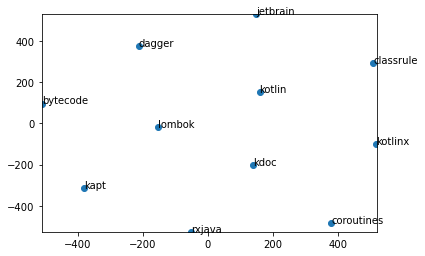

In [14]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(my_w2v_model, 'kotlin', 50) 

In [15]:
#words11 = sorted(my_w2v_model.vocab.keys(), key=lambda word: my_w2v_model.vocab[word].count,reverse=True)[:1000]

#print(words[::100])

In [16]:
#word_vectors11 = np.array([my_w2v_model.get_vector(vector) for vector in words11 ])

In [17]:
#word_vectors11[0:10]

In [18]:
def get_vectors(corpus, model):    
    
    def get_vector(sentence):   
        word_tokens = word_tokenize(sentence)
        vector = 0
        for w in word_tokens:
            try: 
                vector += model.wv[w]
            except:
                continue
        return vector
    
    out_corpus = np.stack(corpus.apply(lambda x: get_vector(x)).to_numpy())
    
    return out_corpus

In [19]:
word2vec_own_vector = get_vectors(train['text'], my_w2v_model)

In [20]:
word2vec_own_vector[:100]

array([[  14.713156  ,    9.740424  ,    0.77472496, ...,   26.669617  ,
         -88.25145   ,   11.357673  ],
       [  12.9667    ,    6.0938635 ,   -4.7402062 , ...,    6.646442  ,
         -28.83625   ,   -3.0171273 ],
       [  70.4106    ,   26.5899    ,  -31.91333   , ...,   68.257065  ,
        -209.81349   ,   29.366915  ],
       ...,
       [  11.486951  ,   10.453823  ,    2.9546452 , ...,   14.559613  ,
         -43.422886  ,   -1.1346167 ],
       [  49.759323  ,    4.3835106 ,    1.874419  , ...,   24.532816  ,
         -81.0034    ,  -11.032522  ],
       [  16.667915  ,   -5.9919267 ,   -8.974178  , ...,   10.98005   ,
         -35.81956   ,   -1.3164984 ]], dtype=float32)

In [21]:
#model['java algorithm graph algorithm implement minimum span forrest algorihm java stick write loop algorithmm input graph g output set mst begin null e g edge vertex g create tree single vertex b add end repeat find edge e e minimum weight one end belong end belong tree add e e null m stick logic highlight block ve use simple object vertex edge tree set use array object']

In [22]:
#model.similarity('java algorithm graph algorithm implement minimum span forrest algorihm java stick write loop algorithmm input graph g output set mst begin null e g edge vertex g create tree single vertex b add end repeat find edge e e minimum weight one end belong end belong tree add e e null m stick logic highlight block ve use simple object vertex edge tree set use array object',
                 #'html dataframe studio date convert number make html datafrane convert datum frame html date convert number keep date')

In [23]:
#model.most_similar('java algorithm graph algorithm implement minimum span forrest algorihm java stick write loop algorithmm input graph g output set mst begin null e g edge vertex g create tree single vertex b add end repeat find edge e e minimum weight one end belong end belong tree add e e null m stick logic highlight block ve use simple object vertex edge tree set use array object')[:2]

### Word2Vec pretrained

In [24]:
 from wikipedia2vec import Wikipedia2Vec

In [25]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
pre_w2v_model = api.load("glove-twitter-25")  # download the model and return as object ready for use

Натренированная выборка тоже хорошо справляется с поиском схожих слов. Все найденно, так или иначе, относится к мобильным устройствам

In [26]:
pre_w2v_model.most_similar("android")

[('ipad', 0.9595541954040527),
 ('ios', 0.9220892190933228),
 ('galaxy', 0.9118210077285767),
 ('nokia', 0.902863621711731),
 ('iphone', 0.9026746153831482),
 ('smartphone', 0.9002943634986877),
 ('samsung', 0.9002325534820557),
 ('windows', 0.8936947584152222),
 ('blackberry', 0.8787710666656494),
 ('apple', 0.8782057762145996)]

In [27]:
word2vec_pretrained_vectors = get_vectors(train['text'], pre_w2v_model)

<ipython-input-18-d7d717576ed9>:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vector += model.wv[w]


In [28]:
word2vec_pretrained_vectors.shape

(48000, 25)

In [29]:
word2vec_pretrained_vectors[:10]

array([[  15.585     ,    8.920469  ,  -10.0193    ,   -7.649794  ,
           8.046451  ,    1.171929  ,   19.197783  ,  -16.500528  ,
          40.88383   ,   -6.754441  ,   -8.033036  ,    2.980152  ,
        -187.10594   ,    2.86724   ,  -13.051007  ,    5.1724224 ,
          -1.5733786 ,    6.258718  ,    0.41600233,   -3.747053  ,
         -31.328411  ,  -13.161798  ,    9.518203  ,    8.978402  ,
         -20.009228  ],
       [   6.10705   ,    5.690519  ,   -1.3116679 ,   -3.715793  ,
           6.670304  ,   -4.4193    ,    9.347806  ,   -4.855344  ,
           6.963854  ,   -1.416729  ,   -0.97706985,    2.223823  ,
         -46.243813  ,   -3.4677298 ,   -3.1072166 ,    8.698366  ,
           7.2478886 ,   -2.647496  ,   -0.2015    ,   -0.480526  ,
          -8.932866  ,  -10.515438  ,   -3.7847507 ,    1.757353  ,
          -8.655391  ],
       [  19.150932  ,   51.270405  ,  -40.05735   ,  -41.37734   ,
           0.45593613,  -32.072823  ,   21.032772  ,   26.95563   ,


### Fasttext pretrained

In [41]:
from gensim.models import KeyedVectors

In [42]:
op = KeyedVectors.load_word2vec_format("/Users/tessergey/wiki-news-300d-1M.vec")

In [43]:
fasttext_pretrained_vectors = get_vectors(train['text'], op)

<ipython-input-29-208de9636144>:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vector += model.wv[w]


### Fasttext own

In [33]:
from gensim.models.fasttext import FastText as FT_trainable
from gensim.test.utils import common_texts

my_ft_model = FT_trainable(size=300)

# build the vocabulary
my_ft_model.build_vocab(sentences=data_tok)

# train the model
my_ft_model.train(
    sentences=data_tok, epochs=my_ft_model.epochs,
    total_examples=my_ft_model.corpus_count, total_words=my_ft_model.corpus_total_words
)

print(my_ft_model)

FastText(vocab=31682, size=300, alpha=0.025)


In [34]:
my_ft_model.similarity("kotlin","java")

<ipython-input-34-b3df84763c6e>:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  my_ft_model.similarity("kotlin","java")


0.437947

Результаты фасттекста отчетливо показывают то, что контекст здесь не учитывается, зато, что касается sub-words и составных слов, тут виден явный акцент на поиск различных форм искомого слова

In [35]:
my_ft_model.most_similar("java")

<ipython-input-35-920955a42583>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  my_ft_model.most_similar("java")


[('ljava', 0.9844433069229126),
 ('drjava', 0.9747886061668396),
 ('javaw', 0.9638990163803101),
 ('javah', 0.9637150764465332),
 ('justjava', 0.9538779258728027),
 ('djava', 0.9496346712112427),
 ('javacv', 0.9406332969665527),
 ('javaee', 0.9401933550834656),
 ('javac', 0.924591600894928),
 ('jav', 0.9172947406768799)]

In [36]:
fasttext_own_vectors = get_vectors(train['text'], my_ft_model)

### TF IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

In [50]:
tf_idf_pretrained_vectors = tf_idf.fit_transform(train['text'])
#tf_idf_pretrained_vectors = tf_idf.transform(test['Full_text'])

In [51]:
tf_idf_pretrained_vectors.shape

(48000, 139828)

In [52]:
tf_idf_pretrained_vectors[:10]

<10x139828 sparse matrix of type '<class 'numpy.float64'>'
	with 330 stored elements in Compressed Sparse Row format>

In [53]:
train.head()

,Id,target,text
0,34862324,2,java algorithm graph algorithm implement minim...
1,47303682,2,html dataframe studio date convert number make...
2,46431243,0,python pandas dataframe pandas groupby pandas ...
3,45306324,0,angular typescript rxjs cast result observable...
4,49479547,1,c window batch file environment variable set b...


In [ ]:
#display_closestwords_tsnescatterplot(, 'kotlin', 50) 

### One Hot Encoding

In [127]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [150]:
vectorizer = CountVectorizer()
ohe_vectors = vectorizer.fit_transform(train["text"])

In [151]:
ohe_vectors.shape

(48000, 139828)

# Part 3

## ML-algorithms

Краткое описание алгоритмов: 
     - Алгоритм ленивого обучения — KNN — это алгоритм ленивого обучения, потому что он не имеет специальной фазы обучения и использует все данные для обучения во время классификации. 
    - Наивные байесовские алгоритмы — это метод классификации, основанный на применении теоремы Байеса с сильным предположением, что все предикторы независимы друг от друга. Это самый простой наивный байесовский классификатор, предполагающий, что данные из каждой метки взяты из простого распределения Гаусса.
    - GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма времязатратным.
    - RF (random forest) — это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству.
    - Деревья решений являются одним из наиболее эффективных инструментов интеллектуального анализа данных и предсказательной аналитики, которые позволяют решать задачи классификации и регрессии. Они представляют собой иерархические древовидные структуры, состоящие из решающих правил вида «Если ..., то ...». Правила автоматически генерируются в процессе обучения на обучающем множестве и, поскольку они формулируются практически на естественном языке (например, «Если объём продаж более 1000 шт., то товар перспективный»), деревья решений как аналитические модели более вербализуемы и интерпретируемы, чем, скажем, нейронные сети.
    - AdaBoost. Улучшает эффективность базовых (слабых) алгоритмов. Является алгоритмом адаптивного бустинга: каждый следующий классификатор учитывает ошибки предыдущего. Слабо подвержен переобучению, что является значительным преимуществом в нашем случае, когда мы сразу обучаем алгоритм на большой выборке 48 000 элементов.
    -Bootstrap Aggregation или bagging выбирает несколько выборок из набора обучающих данных (с заменой) и обучает модель на каждой из них. Окончательный результат усредняется по прогнозам всех подмоделей.
    -ShuffleSplit и KFOLD относятся к кросс-валидации - подходу позволяющему избежать переобучения или улучшить результаты, в случае очень маленького набор входных данных для тренировки. 

Рабочий процесс: Каждый сгенерированный вектор разбивался на train и valid части. Алгоритмы обучались на каждом векторе отдельно и последовательно. Получилось очень много копипаста, но это позволило запускать обучения и предсказания по отдельности, что экономит время на получения результатов для каждого конкретного случая. Результаты сохранялись в табличку для наглядности 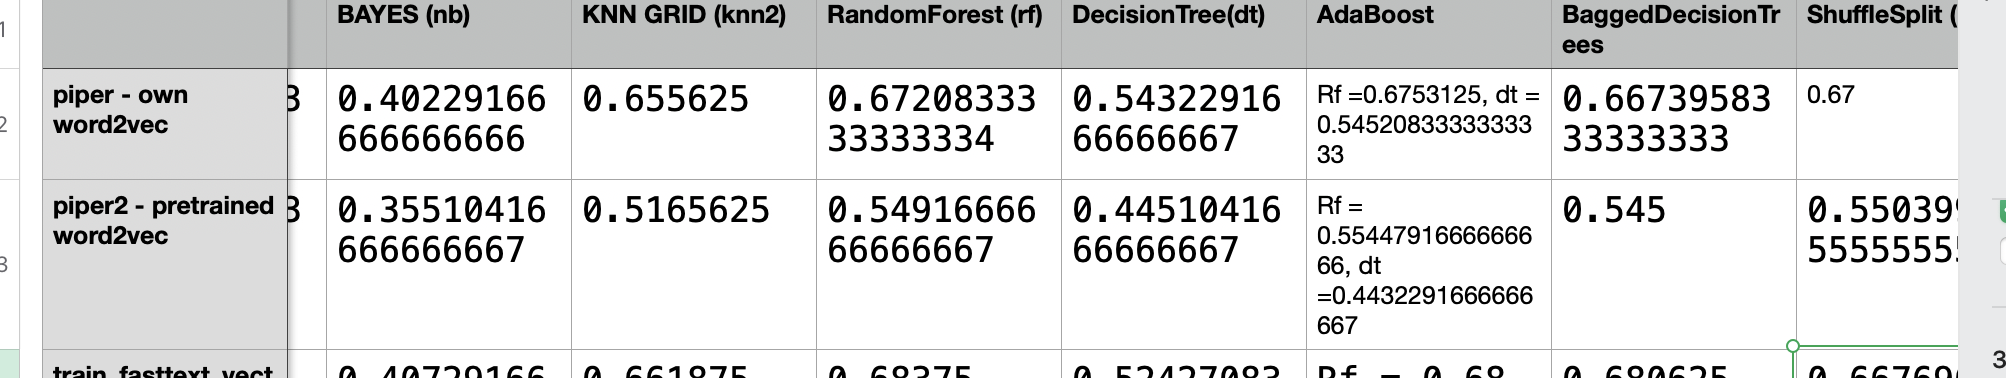

Выводы: 
    Независимо от того, каким способом слова были векторизованы (word2vec, fasttext, tf-idf) точность предсказаний на валидационной выборке была низкой для всех алгоритмов. Вариант с переобученим отпадает, потому что точность на train выборке, также не была сильно высокой, да и в случае с алгоритмами бустинга и кросс-валидации прироста в точности не было заметно. Наиболее вероятной проблемой, на наш взгляд, является плохая подготовка данных. Возможно, нужно было тщательнее подойти к подбору стоп-слов, чтобы исключить как можно больше незначимых данных. Либо, попробовать стемминг вместо лемантизации, тк мы работаем с выборкой на английском языке, грубое "отрезание" части слова не сильно испортило бы контекст. Наибольшая точность, которую получилось достигнуть - 68-70% для алгоритмов: Random Forest, AdaBoost и Bagged Decision Tree. Также можно заметить, что точность на pretrained модели немного ниже, возможно, из за отсутствия специальных IT слов в базе (java, html, c++, kotlin и тд). 

### word2vec_own_vector

In [66]:
y = train['target']

In [67]:
x_train, x_valid, y_train, y_valid = train_test_split(word2vec_own_vector, y, test_size = 0.2)

#### KNN 

In [68]:
knn = KNeighborsClassifier().fit(x_train, y_train)

In [69]:
acc = np.mean(knn.predict(x_train) == y_train)
valid_acc = np.mean(knn.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.7570138888888889, 0.6283854166666667)


#### Bayes

In [56]:
nb = GaussianNB().fit(x_train, y_train)
acc = np.mean(nb.predict(x_train) == y_train)
valid_acc = np.mean(nb.predict(x_valid) == y_valid)
print(f"Bayes: {acc, valid_acc}")

Bayes: (0.40619791666666666, 0.40229166666666666)


Для подбора гипер-параметров используется GridSearch. Конкретно в данном случае используется поиск колличества соседей для knn алгоритма

#### GridSearch for number of neighbors

In [57]:
grid_train = piper
grid_valid = train["target"]
#param_grid=parameters[clf_name], n_jobs=-1
gs = GridSearchCV(knn, param_grid = {"n_neighbors": range(1, 20)}, cv=5)
gs.fit(grid_train, grid_valid)
print(f"Grid Search: {gs.best_params_, gs.best_score_, gs.best_estimator_.n_neighbors}")

Grid Search: ({'n_neighbors': 19}, 0.6593333333333333, 19)


#### KNN with hyperparameters

In [58]:
knn2 = KNeighborsClassifier(n_neighbors = 19).fit(x_train, y_train)
acc = np.mean(knn2.predict(x_train) == y_train)
valid_acc = np.mean(knn2.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.7016666666666667, 0.655625)


#### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train, y_train)
rf_acc = np.mean(rf.predict(x_valid) == y_valid)
print(rf_acc)

#rf_test_results = rf.predict(test)
#print(rf_test_results)

0.7936458333333334


#### Decision Tree

In [61]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#можно добавить max_depth параметр для ограничения глубины
dt = DecisionTreeClassifier()

dt = dt.fit(x_train,y_train)

dt_acc = np.mean(dt.predict(x_valid) == y_valid) 
print(dt_acc)

#dt_test_results = dt.predict(test)
#print(clf_test_results)

#Отрисовка дерева

#from sklearn import tree
#tree.plot_tree(dt)

0.5432291666666667


#### Ensembles

##### AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# RandomForestClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

0.6753125


In [66]:
# Decision Tree
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

0.5452083333333333


##### Bagged dt

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [71]:
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=6)

In [72]:
bgc = bgc.fit(x_train, y_train)

In [73]:
bgc_acc = np.mean(bgc.predict(x_valid) == y_valid)
print(bgc_acc)

0.6673958333333333


#### Cross Validation

#####  ShuffleSplit

In [80]:
from sklearn.model_selection import ShuffleSplit

In [84]:
cvas = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
result = cross_val_score(bgc, x_train, y_train, cv=cvas)
print(results.mean())

0.5411458333333333


#####  KFOLD

In [74]:
from sklearn.model_selection import cross_val_score

In [76]:
kfold = model_selection.KFold(n_splits=10)


In [83]:
results = model_selection.cross_val_score(bgc, x_train, y_train, cv=kfold)
print(results.mean())

0.5411458333333333


##### Cros val with SVC

In [86]:
from sklearn import svm

In [ ]:
# Не дождался
#clfqq = svm.SVC(kernel='linear', C=1)
#scores = cross_val_score(clfqq, x_train, y_train, cv=5)
#print(scores.mean())

### word2vec_pretrained_vectors

In [58]:
y = train['target']

In [59]:
x_train, x_valid, y_train, y_valid = train_test_split(word2vec_pretrained_vectors, y, test_size = 0.2)

#### KNN 

In [60]:
knn = KNeighborsClassifier().fit(x_train, y_train)

In [61]:
acc = np.mean(knn.predict(x_train) == y_train)
valid_acc = np.mean(knn.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.6581510416666667, 0.4923958333333333)


#### Bayes

In [62]:
nb = GaussianNB().fit(x_train, y_train)
acc = np.mean(nb.predict(x_train) == y_train)
valid_acc = np.mean(nb.predict(x_valid) == y_valid)
print(f"Bayes: {acc, valid_acc}")

Bayes: (0.36041666666666666, 0.35510416666666667)


In [64]:
grid_train = piper
grid_valid = train["target"]
#param_grid=parameters[clf_name], n_jobs=-1
gs = GridSearchCV(knn, param_grid = {"n_neighbors": range(1, 20)}, cv=5)
gs.fit(grid_train, grid_valid)
print(f"Grid Search: {gs.best_params_, gs.best_score_, gs.best_estimator_.n_neighbors}")

Grid Search: ({'n_neighbors': 19}, 0.66225, 19)


#### KNN with hyperparameters

In [65]:
knn2 = KNeighborsClassifier(n_neighbors = 19).fit(x_train, y_train)
acc = np.mean(knn2.predict(x_train) == y_train)
valid_acc = np.mean(knn2.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.587734375, 0.5165625)


#### Random Forest

In [66]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train, y_train)
rf_acc = np.mean(rf.predict(x_valid) == y_valid)
print(rf_acc)

#rf_test_results = rf.predict(test)
#print(rf_test_results)

0.5491666666666667


#### Decision Tree

In [67]:
#можно добавить max_depth параметр для ограничения глубины
dt = DecisionTreeClassifier()

dt = dt.fit(x_train,y_train)

dt_acc = np.mean(dt.predict(x_valid) == y_valid) 
print(dt_acc)

#dt_test_results = dt.predict(test)
#print(clf_test_results)

#Отрисовка дерева

#from sklearn import tree
#tree.plot_tree(dt)

0.4451041666666667


#### Ensembles

##### AdaBoost

In [70]:
# RandomForestClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

0.5544791666666666


In [71]:
# Decision Tree
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

0.4432291666666667


##### Bagged dt

In [77]:
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=6)

In [78]:
bgc = bgc.fit(x_train, y_train)

In [79]:
bgc_acc = np.mean(bgc.predict(x_valid) == y_valid)
print(bgc_acc)

0.545


#### Cross Validation

##### ShuffleSplit

In [82]:
cvas = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
result = cross_val_score(bgc, x_train, y_train, cv=cvas)
print(result.mean())

0.5503993055555555


##### KFOLD

In [84]:
kfold = model_selection.KFold(n_splits=10)

In [85]:
results = model_selection.cross_val_score(bgc, x_train, y_train, cv=kfold)
print(results.mean())

0.5576822916666666


### fasttext_pretrained_vectors

In [88]:
y = train['target']

In [89]:
x_train, x_valid, y_train, y_valid = train_test_split(fasttext_pretrained_vectors, y, test_size = 0.2)

#### KNN 

In [90]:
knn = KNeighborsClassifier().fit(x_train, y_train)

In [91]:
acc = np.mean(knn.predict(x_train) == y_train)
valid_acc = np.mean(knn.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.7604427083333334, 0.634375)


#### Bayes

In [92]:
nb = GaussianNB().fit(x_train, y_train)
acc = np.mean(nb.predict(x_train) == y_train)
valid_acc = np.mean(nb.predict(x_valid) == y_valid)
print(f"Bayes: {acc, valid_acc}")

Bayes: (0.418359375, 0.40729166666666666)


In [93]:
grid_train = piper
grid_valid = train["target"]
#param_grid=parameters[clf_name], n_jobs=-1
gs = GridSearchCV(knn, param_grid = {"n_neighbors": range(1, 20)}, cv=5)
gs.fit(grid_train, grid_valid)
print(f"Grid Search: {gs.best_params_, gs.best_score_, gs.best_estimator_.n_neighbors}")

Grid Search: ({'n_neighbors': 19}, 0.66225, 19)


#### KNN with hyperparameters

In [94]:
knn2 = KNeighborsClassifier(n_neighbors = 19).fit(x_train, y_train)
acc = np.mean(knn2.predict(x_train) == y_train)
valid_acc = np.mean(knn2.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.7065625, 0.661875)


#### Random Forest

In [95]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train, y_train)
rf_acc = np.mean(rf.predict(x_valid) == y_valid)
print(rf_acc)

#rf_test_results = rf.predict(test)
#print(rf_test_results)

0.68375


#### Decision Tree

In [96]:
#можно добавить max_depth параметр для ограничения глубины
dt = DecisionTreeClassifier()

dt = dt.fit(x_train,y_train)

dt_acc = np.mean(dt.predict(x_valid) == y_valid) 
print(dt_acc)

#dt_test_results = dt.predict(test)
#print(clf_test_results)

#Отрисовка дерева

#from sklearn import tree
#tree.plot_tree(dt)

0.5242708333333334


#### Ensembles 

##### AdaBoost

In [98]:
# RandomForestClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

0.68


In [99]:
# Decision Tree
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

0.520625


##### Bagged dt

In [101]:
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=6)

In [102]:
bgc = bgc.fit(x_train, y_train)

In [103]:
bgc_acc = np.mean(bgc.predict(x_valid) == y_valid)
print(bgc_acc)

0.680625


#### Cross Validation

##### ShuffleSplit

In [105]:
cvas = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
result = cross_val_score(bgc, x_train, y_train, cv=cvas)
print(result.mean())

0.6676909722222223


##### KFOLD

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
kfold = model_selection.KFold(n_splits=10)

In [108]:
results = model_selection.cross_val_score(bgc, x_train, y_train, cv=kfold)
print(results.mean())

KeyboardInterrupt: 

### fasttext_own_vectors

In [ ]:
y = train['target']

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(fasttext_own_vectors, y, test_size = 0.2)

#### KNN

In [ ]:
knn = KNeighborsClassifier().fit(x_train, y_train)

In [ ]:
acc = np.mean(knn.predict(x_train) == y_train)
valid_acc = np.mean(knn.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

#### Bayes

In [ ]:
nb = GaussianNB().fit(x_train, y_train)
acc = np.mean(nb.predict(x_train) == y_train)
valid_acc = np.mean(nb.predict(x_valid) == y_valid)
print(f"Bayes: {acc, valid_acc}")

In [ ]:
grid_train = piper
grid_valid = train["target"]
#param_grid=parameters[clf_name], n_jobs=-1
gs = GridSearchCV(knn, param_grid = {"n_neighbors": range(1, 20)}, cv=5)
gs.fit(grid_train, grid_valid)
print(f"Grid Search: {gs.best_params_, gs.best_score_, gs.best_estimator_.n_neighbors}")

#### KNN with hyperparameters

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 19).fit(x_train, y_train)
acc = np.mean(knn2.predict(x_train) == y_train)
valid_acc = np.mean(knn2.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_acc = np.mean(rf.predict(x_valid) == y_valid)
print(rf_acc)

#rf_test_results = rf.predict(test)
#print(rf_test_results)

#### Decision Tree

In [ ]:
#можно добавить max_depth параметр для ограничения глубины
dt = DecisionTreeClassifier()

dt = dt.fit(x_train,y_train)

dt_acc = np.mean(dt.predict(x_valid) == y_valid) 
print(dt_acc)

#dt_test_results = dt.predict(test)
#print(clf_test_results)

#Отрисовка дерева

#from sklearn import tree
#tree.plot_tree(dt)

#### Ensembles

##### AdaBoost

In [ ]:
# RandomForestClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

In [ ]:
# Decision Tree
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

##### Bagged dt

In [ ]:
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=6)

In [ ]:
bgc = bgc.fit(x_train, y_train)

In [ ]:
bgc_acc = np.mean(bgc.predict(x_valid) == y_valid)
print(bgc_acc)

#### Cross Validation

##### ShuffleSplit

In [ ]:
cvas = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
result = cross_val_score(bgc, x_train, y_train, cv=cvas)
print(result.mean())

##### KFOLD

In [ ]:
kfold = model_selection.KFold(n_splits=10)

In [ ]:
results = model_selection.cross_val_score(bgc, x_train, y_train, cv=kfold)
print(results.mean())

### tf_idf_pretrained_vectors

In [109]:
y = train['target']

In [110]:
x_train, x_valid, y_train, y_valid = train_test_split(tf_idf_pretrained_vectors, y, test_size = 0.2)

#### KNN

In [111]:
knn = KNeighborsClassifier().fit(x_train, y_train)

In [112]:
acc = np.mean(knn.predict(x_train) == y_train)
valid_acc = np.mean(knn.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.7245833333333334, 0.5861458333333334)


#### Bayes

In [ ]:
nb = GaussianNB().fit(x_train, y_train)
acc = np.mean(nb.predict(x_train) == y_train)
valid_acc = np.mean(nb.predict(x_valid) == y_valid)
print(f"Bayes: {acc, valid_acc}")

In [ ]:
grid_train = piper
grid_valid = train["target"]
#param_grid=parameters[clf_name], n_jobs=-1
gs = GridSearchCV(knn, param_grid = {"n_neighbors": range(1, 20)}, cv=5)
gs.fit(grid_train, grid_valid)
print(f"Grid Search: {gs.best_params_, gs.best_score_, gs.best_estimator_.n_neighbors}")

#### KNN with hyperparameters

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 19).fit(x_train, y_train)
acc = np.mean(knn2.predict(x_train) == y_train)
valid_acc = np.mean(knn2.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train, y_train)
rf_acc = np.mean(rf.predict(x_valid) == y_valid)
print(rf_acc)

#rf_test_results = rf.predict(test)
#print(rf_test_results)

#### Decision Tree

In [ ]:
from sklearn import metrics

#можно добавить max_depth параметр для ограничения глубины
dt = DecisionTreeClassifier()

dt = dt.fit(x_train,y_train)

dt_acc = np.mean(dt.predict(x_valid) == y_valid) 
print(dt_acc)

#dt_test_results = dt.predict(test)
#print(clf_test_results)

#Отрисовка дерева

#from sklearn import tree
#tree.plot_tree(dt)

#### Ensembles

##### AdaBoost

In [ ]:
# RandomForestClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

In [ ]:
# Decision Tree
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

##### Bagged dt

In [ ]:
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=6)

In [ ]:
bgc = bgc.fit(x_train, y_train)

In [ ]:
bgc_acc = np.mean(bgc.predict(x_valid) == y_valid)
print(bgc_acc)

#### Cross Validation

##### ShuffleSplit

In [ ]:
cvas = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
result = cross_val_score(bgc, x_train, y_train, cv=cvas)
print(result.mean())

##### KFOLD

In [ ]:
kfold = model_selection.KFold(n_splits=10)

In [ ]:
results = model_selection.cross_val_score(bgc, x_train, y_train, cv=kfold)
print(results.mean())

### ohe_vectors

In [ ]:
y = train['target']

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(ohe_vectors, y, test_size = 0.2)

#### KNN

In [153]:
knn = KNeighborsClassifier().fit(x_train, y_train)
acc = np.mean(knn.predict(x_train) == y_train)
valid_acc = np.mean(knn.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

KNN: (0.70640625, 0.5673958333333333)


#### Bayes

In [ ]:
nb = GaussianNB().fit(x_train, y_train)
acc = np.mean(nb.predict(x_train) == y_train)
valid_acc = np.mean(nb.predict(x_valid) == y_valid)
print(f"Bayes: {acc, valid_acc}")

In [ ]:
grid_train = piper
grid_valid = train["target"]
#param_grid=parameters[clf_name], n_jobs=-1
gs = GridSearchCV(knn, param_grid = {"n_neighbors": range(1, 20)}, cv=5)
gs.fit(grid_train, grid_valid)
print(f"Grid Search: {gs.best_params_, gs.best_score_, gs.best_estimator_.n_neighbors}")

#### KNN with hyperparameters

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 19).fit(x_train, y_train)
acc = np.mean(knn2.predict(x_train) == y_train)
valid_acc = np.mean(knn2.predict(x_valid) == y_valid)
print(f"KNN: {acc, valid_acc}")

#### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)

rf.fit(x_train, y_train)
rf_acc = np.mean(rf.predict(x_valid) == y_valid)
print(rf_acc)

#rf_test_results = rf.predict(test)
#print(rf_test_results)

#### Decision Tree

In [ ]:
from sklearn import metrics

#можно добавить max_depth параметр для ограничения глубины
dt = DecisionTreeClassifier()

dt = dt.fit(x_train,y_train)

dt_acc = np.mean(dt.predict(x_valid) == y_valid) 
print(dt_acc)

#dt_test_results = dt.predict(test)
#print(clf_test_results)

#Отрисовка дерева

#from sklearn import tree
#tree.plot_tree(dt)

#### Ensembles

###### AdaBoost

In [ ]:
# RandomForestClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

In [ ]:
# Decision Tree
abc = AdaBoostClassifier(base_estimator = dt, n_estimators = 200)
abc = abc.fit(x_train, y_train)
abc_acc = np.mean(abc.predict(x_valid) == y_valid)
print(abc_acc)

##### Bagged DT

In [ ]:
bgc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=6)

In [ ]:
bgc = bgc.fit(x_train, y_train)

In [ ]:
bgc_acc = np.mean(bgc.predict(x_valid) == y_valid)
print(bgc_acc)

#### Cross Validation

##### ShuffleSplit

In [ ]:
cvas = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
result = cross_val_score(bgc, x_train, y_train, cv=cvas)
print(result.mean())

##### KFOLD

In [ ]:
kfold = model_selection.KFold(n_splits=10)

In [ ]:
results = model_selection.cross_val_score(bgc, x_train, y_train, cv=kfold)
print(results.mean())

# Part 4. Нейронные сети

## Обработка данных

In [39]:
data = pd.read_parquet('/Users/tessergey/Downloads/lab1/train.parquet', engine='fastparquet')
data.head()

,Body,Tags,Title,target
Id,,,,
34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2
47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2
46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0
45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0
49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1


In [40]:
# Выделение категориальных признаков и target
text_columns = ["Title", "Body"]
categorical_columns = ["Tags"]
target_column = "target"

data[categorical_columns] = data[categorical_columns].fillna('NaN') # cast missing values to string "NaN"

data.sample(3)

,Body,Tags,Title,target
Id,,,,
38040282,I am working with C# Visual studio sql server ...,<c#><sql-server>,Retrieve the tables from sql server management...,2
37082792,<p>I have a huge JSON data as below. Now I nee...,<javascript><json><parsing>,How can I filter a JSON data in javascript?,1
57810339,I was searching for c programs on the net and ...,<javascript><html><css><firefox>,website is showing up as part text and part ht...,2


In [42]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
data['Body'] = [' '.join(tokenizer.tokenize(sentence.lower())) for sentence in data['Body']]
# pandas LEVEL GOD
data['Title'] = data['Title'].apply(str).apply(str.lower).apply(tokenizer.tokenize).apply(' '.join)

In [43]:
from collections import Counter
#token_counts = <YOUR CODE>
#python GOD LEVEL
token_counts = Counter(token for col in text_columns
                             for item in data[col]
                             for token in item.split())

In [44]:
token_counts

Counter({'i': 195458,
         'am': 19056,
         'implementing': 253,
         'a': 128048,
         'minimum': 289,
         'spanning': 6,
         'forrest': 3,
         'algorihm': 2,
         'in': 86150,
         'java': 20156,
         '.': 543501,
         'but': 29950,
         'stuck': 629,
         'on': 27582,
         'how': 32682,
         'to': 144464,
         'write': 4025,
         'loop': 3577,
         'r': 8442,
         'studio': 2757,
         ':': 161977,
         'date': 5758,
         'is': 77406,
         'getting': 4239,
         'converted': 259,
         'number': 8235,
         ',': 202492,
         'while': 5672,
         'making': 1045,
         'html': 9267,
         'of': 53760,
         'datafrane': 1,
         'pandas': 866,
         '-': 143070,
         'dataframe': 1070,
         'groupby': 136,
         'get': 18396,
         'sum': 2017,
         'multiple': 2609,
         'columns': 1829,
         'casting': 86,
         'results': 2026,
 

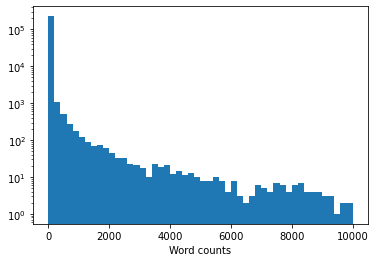

In [45]:
plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True)
plt.xlabel("Word counts");

In [46]:
min_count = 10
tokens = [token for token, count in token_counts.items()
          if count >= min_count]

In [47]:
# Add a special tokens for unknown and empty words
UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + sorted(tokens)
print("Vocabulary size:", len(tokens))

Vocabulary size: 24477
Correct!


In [48]:
token_to_id = dict(map(reversed, enumerate(tokens)))

In [49]:
token_to_id

{'UNK': 0,
 'PAD': 1,
 '\x01': 2,
 '\x02': 3,
 '\x03': 4,
 '\x04': 5,
 '\x05': 6,
 '\x06': 7,
 '\x07': 8,
 '\x08': 9,
 '!': 10,
 '!!': 11,
 '!!!': 12,
 '!!!!': 13,
 '!!!"': 14,
 '!!!</': 15,
 '!!");': 16,
 '!!</': 17,
 '!!}': 18,
 '!!}</': 19,
 '!"': 20,
 '!")': 21,
 '!");': 22,
 '!",': 23,
 '!";': 24,
 '!"</': 25,
 '!$': 26,
 '!&': 27,
 "!'": 28,
 "!')": 29,
 "!');": 30,
 "!',": 31,
 "!';": 32,
 '!(': 33,
 '!("': 34,
 '!)': 35,
 '!):': 36,
 '!)</': 37,
 '!**': 38,
 '!,': 39,
 '!-': 40,
 '!.': 41,
 '!/': 42,
 '!/:': 43,
 '!<': 44,
 '!</': 45,
 '!=': 46,
 "!='": 47,
 "!='\\": 48,
 '!=-': 49,
 '!==': 50,
 '!?': 51,
 '![': 52,
 '!\\': 53,
 '"': 54,
 '"!': 55,
 '"!");': 56,
 '"!=': 57,
 '""': 58,
 '"""': 59,
 '""")': 60,
 '"")': 61,
 '""))': 62,
 '""),': 63,
 '"").': 64,
 '"");': 65,
 '""){': 66,
 '""+': 67,
 '"",': 68,
 '"",""': 69,
 '"".': 70,
 '"":': 71,
 '"";': 72,
 '"#': 73,
 '"#"': 74,
 '"#/': 75,
 '"#{': 76,
 '"$': 77,
 '"$"': 78,
 '"$(': 79,
 '"${': 80,
 '"%': 81,
 '"%.': 82,
 '"%>

In [50]:
UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

In [51]:
from sklearn.feature_extraction import DictVectorizer

# we only consider top-1k most frequent data to minimize memory usage
top_companies, top_counts = zip(*Counter(data['Tags']).most_common(1000))
recognized_companies = set(top_companies)
data["Tags"] = data["Tags"].apply(lambda comp: comp if comp in recognized_companies else "Other")

categorical_vectorizer = DictVectorizer(dtype=np.float32, sparse=False)
categorical_vectorizer.fit(data[categorical_columns].apply(dict, axis=1))

DictVectorizer(dtype=<class 'numpy.float32'>, sparse=False)

In [52]:
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
data_train.index = range(len(data_train))
data_val.index = range(len(data_val))

In [53]:
def make_batch(data, max_len=None, word_dropout=0):
    """
    Creates a keras-friendly dict from the batch data.
    :param word_dropout: replaces token index with UNK_IX with this probability
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    batch = {}
    batch["Title"] = as_matrix(data["Title"].values, max_len)
    batch["Body"] = as_matrix(data["Body"].values, max_len)
    batch['Tags'] = categorical_vectorizer.transform(data[categorical_columns].apply(dict, axis=1))
    
    if word_dropout != 0:
        batch["Body"] = apply_word_dropout(batch["Body"], 1. - word_dropout)
    
    if target_column in data.columns:
        batch[target_column] = data[target_column].values
    
    return batch

def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

In [54]:
make_batch(data_train[:3], max_len=10)

{'Title': array([[19291, 13432, 12538,  4180, 17202, 10416,     1,     1,     1,
             1],
        [12153,  6425, 22870, 12463, 22100, 10709,  4843, 19744, 12437,
         16990],
        [23687, 13070, 18588, 20958, 19412,  3703,     1,     1,     1,
             1]], dtype=int32),
 'Body': array([[12276,  4787, 22437, 22100, 10024,  4180, 20355, 12538, 15354,
         17202],
        [12538, 21908,  7071,  9815, 16273, 23685, 19408, 10416, 22100,
          8985],
        [ 3378, 16759,  3569, 12276, 23534, 14330, 12954, 12153, 19641,
          4180]], dtype=int32),
 'Tags': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 'target': array([2, 2, 0])}

In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [56]:
import keras.layers as L

In [57]:
def build_model(n_tokens=len(tokens), n_cat_features=len(categorical_vectorizer.vocabulary_), hid_size=64):
    """ Build a model that maps three data sources to a single linear output: predicted log1p(salary) """
    
    l_title = L.Input(shape=[None], name="Title")
    l_descr = L.Input(shape=[None], name="Body")
    l_categ = L.Input(shape=[n_cat_features], name="Tags")
    

    emb = L.Embedding(len(tokens), 64)
    l_title_emb = emb(l_title)
    l_title_emb = L.GlobalMaxPool1D()(l_title_emb)

    l_descr_emb = emb(l_descr)
    l_descr_emb = L.Dense(128)(l_descr_emb)
    l_descr_emb = L.GlobalMaxPool1D()(l_descr_emb)

    l_cat_emb = L.Dense(128)(l_categ)


    l_all = L.Concatenate()([l_cat_emb, l_descr_emb, l_title_emb])
    l_all = L.Dense(123)(l_all)

    output_layer = L.Dense(1)(l_all)

    
    model = keras.models.Model(inputs=[l_title, l_descr, l_categ], outputs=[output_layer])
    model.compile('adam', 'mean_squared_error', metrics=['mean_absolute_error'])
    return model
    

In [58]:
model = build_model()
model.summary()

dummy_pred = model.predict(make_batch(data_train[:100]))
dummy_loss = model.train_on_batch(make_batch(data_train[:100]), data_train['target'][:100])[0]
assert dummy_pred.shape == (100, 1)
assert len(np.unique(dummy_pred)) > 20, "model returns suspiciously few unique outputs. Check your initialization"
assert np.ndim(dummy_loss) == 0 and 0. <= dummy_loss <= 250., "make sure you minimize MSE"

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 64)     1566528     Title[0][0]                      
                                                                 Body[0][0]                       
__________________________________________________________________________________________________
Title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
Tags (InputLayer)               [(None, 1001)]       0                                 

/Users/tessergey/ml/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:540: UserWarning: Input dict contained keys ['target'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


In [59]:
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, **kwargs):
    """ iterates minibatches of data in random order """
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], **kwargs)
            target = batch.pop(target_column)
            yield batch, target
        
        if not cycle: break

In [60]:
batch_size = 256
epochs = 3            # definitely too small
steps_per_epoch = 100  # for full pass over data: (len(data_train) - 1) // batch_size + 1

model = build_model()

model.fit_generator(iterate_minibatches(data_train, batch_size, cycle=True, word_dropout=0.05), 
                    epochs=epochs, steps_per_epoch=steps_per_epoch,
                    
                    validation_data=iterate_minibatches(data_val, batch_size, cycle=True),
                    validation_steps=data_val.shape[0] // batch_size
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
100/100 [==============================] - 81s 809ms/step - loss: 0.3827 - mean_absolute_error: 0.4867 - val_loss: 0.1152 - val_mean_absolute_error: 0.2721
Epoch 2/3
100/100 [==============================] - 86s 861ms/step - loss: 0.0933 - mean_absolute_error: 0.2381 - val_loss: 0.0889 - val_mean_absolute_error: 0.2313
Epoch 3/3
100/100 [==============================] - 77s 773ms/step - loss: 0.0778 - mean_absolute_error: 0.2143 - val_loss: 0.0846 - val_mean_absolute_error: 0.2244


In [61]:
def print_metrics(model, data, batch_size=batch_size, name="", **kw):
    squared_error = abs_error = num_samples = 0.0
    for batch_x, batch_y in iterate_minibatches(data, batch_size=batch_size, shuffle=False, **kw):
        batch_pred = model.predict(batch_x)[:, 0]
        squared_error += np.sum(np.square(batch_pred - batch_y))
        abs_error += np.sum(np.abs(batch_pred - batch_y))
        num_samples += len(batch_y)
    print("%s results:" % (name or ""))
    print("Mean square error: %.5f" % (squared_error / num_samples))
    print("Mean absolute error: %.5f" % (abs_error / num_samples))
    return squared_error, abs_error
    
print_metrics(model, data_train, name='Train')
print_metrics(model, data_val, name='Val');

Train results:
Mean square error: 0.05915
Mean absolute error: 0.18467
Val results:
Mean square error: 0.08490
Mean absolute error: 0.22486


# Part 5. Предсказание для test.csv

### Предобработка 

In [62]:
test = pd.read_parquet('/Users/tessergey/Downloads/lab1/test.parquet', engine='fastparquet')

In [63]:
test.head()

,Body,Tags,Title
Id,,,
46785369,I was given a decision tree with sample data i...,<math><machine-learning><artificial-intelligen...,Desecion trees ended up with same given tree a...
38908667,<p>I am moving a test application over to Xcod...,<ios><swift><swift3><xcode8><nserror>,Value of type 'Error' has no member 'code'
44703012,<p>I would like to be able to perform linting ...,<jenkins><jenkins-pipeline>,How do I lint Jenkins pipelines from the comma...
34910435,"<p>I’m using <a href=""https://github.com/ftlab...",<javascript><css><mobile-safari><fastclick.js>...,Is there a way to prevent fastclick from firin...
51632121,I have some 5 Test cases and I want them to ke...,<android><testing><appium><katalon-studio>,How to loop test cases in katalon Studio?


In [70]:
#Создание нового столбца text, который объединил три остальных текстовых столбца 
test["text"] = test["Tags"] + " " + test["Title"] + " " + test["Body"]
#Удаление ненужных уже столбцов
test.drop(['Tags','Title','Body'], axis = 1, inplace = True)

In [71]:
#Приведение всех букв к нижнему регистру 
test["text"] = test["text"].str.lower()
test.head()

,text
Id,
46785369,<math><machine-learning><artificial-intelligen...
38908667,<ios><swift><swift3><xcode8><nserror> value of...
44703012,<jenkins><jenkins-pipeline> how do i lint jenk...
34910435,<javascript><css><mobile-safari><fastclick.js>...
51632121,<android><testing><appium><katalon-studio> how...


In [73]:
#Отчистка специальных знаков и знаков пунктуации 
import re
def preprocess(whole_text, with_dots):
    if with_dots == True:
        whole_text = re.sub(r'[^(a-zA-Z.)\s]',' ', whole_text)
    else:
        whole_text = re.sub(r'[^(a-zA-Z)\s]',' ', whole_text)
    whole_text = re.sub(' +', ' ', whole_text)
    return whole_text

test["text"] = test["text"].apply(preprocess, with_dots = True)
#test["text"] = test["text"].apply(preprocess, with_dots = False)
test.head()

,text
Id,
46785369,math machine learning artificial intelligence...
38908667,ios swift swift xcode nserror value of type e...
44703012,jenkins jenkins pipeline how do i lint jenkin...
34910435,javascript css mobile safari fastclick js fas...
51632121,android testing appium katalon studio how to ...


In [74]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize   
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/tessergey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tessergey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tessergey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
 import spacy
spacyEnglishObject = spacy.load('en', disable=['parser', 'ner'])

#Функция которая лемнтизирует предложение 
def preprocess_sentence(sentence):
    parsedSentence = spacyEnglishObject(sentence)
    filtered_sentence = " ".join([token.lemma_ for token in parsedSentence])
    return filtered_sentence

In [76]:
#Применение функции к каждой строке
test['text'] = test['text'].apply(lambda x: preprocess_sentence(x))
test.head()

,text
Id,
46785369,math machine learn artificial intelligence d...
38908667,ios swift swift xcode nserror value of type ...
44703012,jenkins jenkins pipeline how do i lint jenki...
34910435,javascript css mobile safari fastclick js fa...
51632121,android testing appium katalon studio how to...


In [78]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
myStopList = set(STOPWORDS)
myStopList.update(["p", "div", "-PRON-", "gt", "t", "td", "lt"])

In [79]:
#remove stop words
def remove_stop_words(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = ' '.join([w for w in word_tokens if w not in myStopList])
    return filtered_sentence

In [80]:
test["text"] = test["text"].apply(lambda x: remove_stop_words(x))

### Векторизация test 

In [85]:
df1 = test[["text"]]

In [86]:
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [87]:
test_tok = [tokenizer.tokenize(u) for u in df2]

In [88]:
test_w2v_model = Word2Vec(test_tok, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [89]:
test_vector = get_vectors(test['text'], test_w2v_model)

### Обучение и предсказание

Для генерации меток классов будет использоваться алгоритм AdaBoost, который в качестве базового классификатора принимает RandomForest. AdaBoost показал относительно высокую точность предсказаний на валидационной выборке, а также менее остальных подвержен переобучению, что важно, ведь, обучение будет происходить на всем векторе word2vec_own_vectors. 

In [96]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator = rf, n_estimators = 200)
abc = abc.fit(word2vec_own_vector, train["target"])

In [105]:
prediction = abc.predict(test_vector)

In [106]:
prediction[:10]

array([2, 2, 2, 0, 1, 2, 2, 2, 0, 2])

#### Сохранение ответов в файл

In [107]:
result = test.copy()

In [109]:
result["Predicted"] = prediction

In [111]:
result.drop(['text'], axis = 1, inplace = True)

In [112]:
result.head()

,Predicted
Id,
46785369,2
38908667,2
44703012,2
34910435,0
51632121,1


In [113]:
result.to_csv('result.csv', index=True)